## Esame Metodi Numerici  18 Luglio 2025 - Turno II

# Esercizio 1

- ## Si considerino i due sistemi lineari:

     A  x = b 

    A1 x1 = b1

dove A, A1 sono le matrici dei coefficienti, b e b1 sono i termini noti, ed x ed x1 sono i vettori incogniti da determinare.
I dati di questi due sistemi lineari sono contenuti nel file **testI.mat**.


- Si risolva ciascuno dei sistemi lineari assegnati  utilizzando il metodo più adatto in base alle caratteristiche della matrice dei coefficienti, giustificando teoricamente le scelte effettuate.
                                      **punti 6**

Per il sistema A  x = b1, , aggiungere una perturbazione dello 0.1% sulla componente 1-esima del termine noto, e risolvere il sistema con termine noto perturbato. Calcolare quindi  l'errore relativo sulla soluzione e l'errore relativo sui dati e giustificare i risultati alla luce della teoria, richiamando il teorema opportuno.
                                      **punti 2**


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

- # Dato il sistema lineare 
A3 x3 = b3
dove 

A3=np.array([[8,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8,  4.0, 3.0])

- Verificare senza calcolare il raggio spettrale della matrice di iterazione che il metodo di Gauss-Seidel converge, richiamando il teorema che garantisce la convergenza di Gauss-Seidel per classi particolari di 
matrici     **punti[1]**.
- Implementare il metodo di Gauss-Seidel  e risolvere il sistema lineare A3 x3= b3  **punti[3]**.

Totale **Punti 12**

# Soluzione:

In [1]:
from scipy.io import loadmat
import numpy as np
import scipy as sp
import scipy.linalg as spLin
from SolveTriangular import *
import matplotlib.pyplot as plt
import sympy as sym
from sympy import symbols, Matrix, lambdify

dati = loadmat('testI')
A=dati["A"] 
A=A.astype(float)
b=dati["b"] 
b=b.astype(float)
A1=dati["A1"] 
A1=A1.astype(float)
b1=dati["b1"] 
b1=b1.astype(float)

In [2]:
print(A.shape) # Quadrata
print(A1.shape)

print(np.linalg.cond(A)) # Ben condizionata
print(np.linalg.cond(A1)) # Mal condizionata

def dd(A):
    d=np.diag(A)
    ext=np.sum(A,axis=1)
    ext=ext-d
    return np.all(d > ext)

print(dd(A)) # A diagonale dominante
# np.linalg.cholesky(A) cholesky decompone la matrice correttamente

(10, 10)
(20, 15)
12.81454459956794
4.431398112181307e+16
True


## Risolviamo la prima matrice con fattorizzazione di gauss

In [3]:
PT,L,U = sp.linalg.lu(A)
P = PT.T.copy()
y,flag=Lsolve(L,P@b)
x,flag=Usolve(U,y)
print(flag)
# np.linalg.solve(A,b) corretto

0


## Risolviamo la seconda con svd-ls

In [4]:
# def SVDLS(A,b):
#     #Risolve un sistema sovradeterminato con il metodo SVD-LS
#     m,n=A.shape  #numero di righe e  numero di colonne di A
#     U,s,VT=spLin.svd(A)  #Attenzione : Restituisce U, il numpy-array 1d che contiene la diagonale della matrice Sigma e VT=VTrasposta)
#     print(U)
#     print(s)
#     print(VT)
    
#     #Quindi 
#     V=VT.T
#     thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
#     k=np.count_nonzero(s>thresh)
#     print("rango=",k)
#     d=
#     d1=#to do
#     s1=#to do
#     #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
#     c=#to do
#     x=V[:,:k]@c 
#     residuo=np.linalg.norm(d[k:])**2
#     return x,residuo

## Perturbiamo A

In [5]:
bb=b.copy()
bb[1]=bb[1]*0.001
xx=np.linalg.solve(A,bb)
erroreX=np.linalg.norm(b-bb)/np.linalg.norm(b)
erroreY=np.linalg.norm(x-xx)/np.linalg.norm(x)
print("Errore relativo sui dati: ",erroreX)
print("Errore relativo sulla soluzione: ",erroreY)
print("Indice di condizionamento: ",np.linalg.cond(A))


Errore relativo sui dati:  0.3911468114170354
Errore relativo sulla soluzione:  0.3991307876979929
Indice di condizionamento:  12.81454459956794


Un basso indice di condizionamento ci predice che la perturbazione sui risultati ottenuta perturbando i dati sarà altrettanto bassa. 

Infatti ||x-x^||/||x|| = ||indK|| * ||b-b^||/||b||

## Matrice A3

In [6]:
A3=np.array([[8,0,1,1],[0,0.8,1,0],[1,1,2,0],[1,0,0.0,2.0]])
b3= np.array([10.0, 1.8,  4.0, 3.0])

Per verificare che gauss sidel converge sfruttiamo il teorema di sylvester per controllare che la matrice sia simmetrica e definita positiva. Si dimostra infatti che per una matrice simmetrica e definita positiva il metodo di gauss sidel converge per ogni punto iniziale.  

In [7]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    invM=np.linalg.inv(M)
    T=invM@N
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while toll<errore and it<it_max:
        temp=N@x0+b
        x,_=Lsolve(M,temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

raggio spettrale Gauss-Seidel  0.6936887195995491
87
[[1.]
 [1.]
 [1.]
 [1.]]


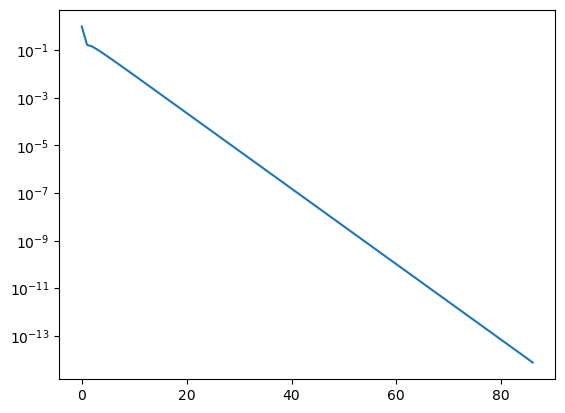

In [8]:
toll=1e-14
it_max=1000
b3=b3.reshape(4,1)
x0=np.zeros_like(b3)

x,it,er_vet=gauss_seidel(A3,b3,x0,toll,it_max)
plt.semilogy(np.arange(it),er_vet)
print(it)
print(x)

# Esercizio 2

-  Si consideri la funzione $$f(x)=  0.1*x^5 - 0.1*x^4 - x^3 + 0.4*x^2 + 2.4*x$$  

-  Si rappresenti il grafico della funzione in [-3,4] e si determini in quanti punti la funzione si annulla. [**punti 0.5**]

-  Si implementi  il metodo di Newton per il calcolo degli zeri di una funzione non lineare [**punti 2**]

-  Si implementi il metodo di Bisezione per il calcolo degli zeri di una funzione non lineare [**punti 2**]

- Si definisca teoricamente l'ordine di convergenza di un metodo iterativo ed il fattore di convergenza.
[**punti 2**]

-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno intervallo che lo contenga. Si applichi il metodo di Bisezione per determinare lo zero della funzione in tale sottointervallo. Si valuti l'ordine di convergenza del metodo usando la funzione stimaordine. Si dica se è possibile calcolare tutti gli zeri facendo uso del metodo di bisezione, richiamando il teorema su cui si basa il metodo di bisezione.
[**punti 2**]
-  Osservando il grafico della funzione, si identifichi,  per ogni punto in cui si annulla, un opportuno iterato iniziale in un intorno dello zero e si utilizzi  il metodo di Newton per determinare lo zero della funzione. Si calcoli l'ordine del metodo usando la funzione stimaordine.
[**punti 2**]

- Cosa soi osserva se si sceglie x0=1.0 come iterato iniziale?
[**punti 0.5**]

-  Nel caso in cui si verifichi che il metodo di Newton abbia ordine 1, spiegare il perchè richiamando la teoria e modificare il metodo affinchè il suo ordine sia 2.
[**punti 2**]


**Totale 13 punti**

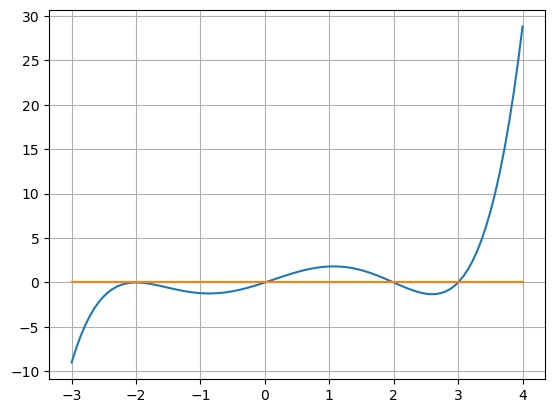

In [9]:
x=sym.symbols('x')
fs = 0.1*x**5- 0.1*x**4- x**3+ 0.4*x**2+ 2.4*x
f=lambdify(x,fs,np)

x=np.linspace(-3,4,100)
plt.plot(x,f(x),x,np.zeros_like(x))
plt.grid(True)
# Guardando il grafico notiamo che la funzione si annulla in 2 punti


In [10]:
import math
def sign(x):
  """
  Funzione segno che restituisce 1 se x è positivo, 0 se x è zero e -1 se x è negativo.
  """
  return math.copysign(1, x)

def metodo_bisezione(fname, a, b, tolx):
 
 fa=fname(a)
 fb=fname(b)
 if sign(fa*fb) > -1:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1
 
 while maxit > it :  #it<it_max:
    xk = a+(b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

    if sign(fxk*fb) < 0:
      a = xk
      fa= fxk 
    elif sign(fa*fxk) < 0:
      b = xk
      fb= fxk

 
 return xk, it, v_xk


In [11]:
def stima_ordine(xk,iterazioni):
     #Vedi dispensa allegata per la spiegazione

      k=iterazioni-4
      p=np.log(abs(xk[k+2]-xk[k+3])/abs(xk[k+1]-xk[k+2]))/np.log(abs(xk[k+1]-xk[k+2])/abs(xk[k]-xk[k+1]));
     
      ordine=p
      return ordine

La funzione di bisezione si basa sul teorema degli zeri. La funzione ha uno zero tra due estremi se essi sono discordi

Secondo zero=  -7.27592228890537e-12
Ordine:  1.0
Terzo zero=  1.9999999999883584
Ordine:  0.9999793621877872
Quarto zero=  3.000000000005821
Ordine:  1.000009172428031


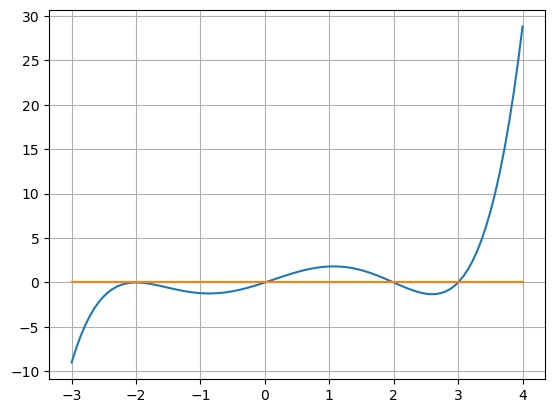

In [12]:
x=sym.symbols('x')
fs = 0.1*x**5- 0.1*x**4- x**3+ 0.4*x**2+ 2.4*x
f=lambdify(x,fs,np)
a=-3
b=4
tolx=1e-11
x=np.linspace(a,b,100)

plt.grid(True)
plt.plot(x,f(x),x,np.zeros_like(x))

# xk, it, v_xk=metodo_bisezione(f, -2.5, -2.1, tolx)
# print("Primo zero= ",xk) #Bisezione non può essere applicata in questo punto(teorema degli zeri)

xk, it, v_xk=metodo_bisezione(f, -0.3, 0.8, tolx)
print("Secondo zero= ",xk)
# print(it,v_xk))
print("Ordine: ",stima_ordine(v_xk,it))

xk, it, v_xk=metodo_bisezione(f, 1.9, 2.1, tolx)
print("Terzo zero= ",xk)
print("Ordine: ",stima_ordine(v_xk,it))

xk, it, v_xk=metodo_bisezione(f, 2.8, 3.1, tolx)
print("Quarto zero= ",xk)
print("Ordine: ",stima_ordine(v_xk,it))


In [13]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
  
        xk=[]
       
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while tolx < errorex and tolf < erroref :
           
           fx0=fname(x0)
           fpx=fpname(x0)
           if fpx == 0:
                print("derivata prima nulla in x0")
                return None, None,None
           d=fx0/fpx

           x1=x0-d
           fx1=fname(x1)
           erroref=np.abs(fx1)
           if x1!=0:
                errorex=np.linalg.norm(x0-x1)/np.linalg.norm(x1)
           else:
                errorex=np.linalg.norm(x0-x1)

           it=it+1
           x0=x1
           xk.append(x1)
          
        if it==nmax:
            print('Newton: raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [22]:
x=sym.symbols('x')
fs = 0.1*x**5- 0.1*x**4- x**3+ 0.4*x**2+ 2.4*x
dfs=sym.diff(fs,x,1) #Il secondo argomento rappresenta la variabile rispetto a cui derivare e l'ultima l'ordine della derivata
fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function 
f=lambdify(x,fs,np)

tolf=1e-5
tolx=1e-5
nmax=10

x0=-2
x1,it,xk=xk, it, v_xk=newton(f,fp,x0,tolx,tolf,nmax)
print(x1)

x0=1.0
x1,it,xk=xk, it, v_xk=newton(f,fp,x0,tolx,tolf,nmax)
print(x1)

dfs=sym.diff(fs,x,1) #Il secondo argomento rappresenta la variabile rispetto a cui derivare e l'ultima l'ordine della derivata
dfs2=sym.diff(fs,x,2)
fp=lambdify(x,dfs,np)  #l'ultimo argomento np (nickaname di numpy) serve per specificare che la lambda function
fp2=lambdify(x,dfs,np)

print(f(2))
print(fp(-2)) 

Modifichiamo newton verificando che le derivate si annullano per le derivate di tutti i gradi fino alla n-esima. Usiamo quindi n-1 come valore m nel metodo newton modificato.

-2.001007168936756
-2.000929655346208
-8.881784197001252e-16
-8.881784197001252e-16


In [ ]:
def newton_modificato(fname,fpname,m,x0,tolx,tolf,nmax):
  
        #m è la molteplicità dello zero
    
         xk=[]
       
        it=0
        errorex=1+tolx
        erroref=1+tolf
        while #to do
           
           fx0=fname(x0)
           if 
                print(" derivata prima nulla in x0")
                return None, None,None
           d=

           x1=x0-m*d
           fx1=fname(x1)
           erroref=np.abs(fx1)
           if x1!=0:
                errorex=#to do
           else:
                errorex=#to do 

           it=it+1
           x0=x1
           xk.append(x1)
          
        if it==nmax:
            print('Newton modificato: raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk
    

L'ordine di convergenza di un metodo iterativo indica ogni quante iterazioni abbiamo un aumento del numero di cifre esatte della soluzione prodotta. Ad esempio per un ordine lineare abbiamo che le cifre significative esatte della soluzione aumentano lineramente con il numero di iterazioni mentre un per ordine quadratico abbiamo che le cifre significative esatte raddoppiano a ogni iterazione.
Per calcolarlo possiamo usare la funzione stima_ordine implementata qui sopra.

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1** 
Quale delle seguenti affermazioni è FALSA riguardo alle reti MLP (Multilayer Perceptron)?

- Le reti MLP sono composte da uno o più strati nascosti di neuroni.
- Le reti MLP utilizzano una funzione di attivazione non lineare per introdurre una non linearità nel modello.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

- Le reti MLP possono essere utilizzate per risolvere una vasta gamma di problemi di apprendimento automatico, tra cui la classificazione e la regressione.

- Le reti MLP sono in grado di apprendere solo relazioni lineari tra i dati di input e output.

**2.**  Quale delle seguenti affermazioni è la definizione CORRETTA di learning rate nel training di una rete neurale?

A) Il numero di volte in cui l'intero set di dati viene utilizzato durante il training.

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

C) Il numero di neuroni presenti nello strato di output della rete.

D) La funzione di attivazione utilizzata dai neuroni della rete.ressione

B) Un parametro che controlla la velocità con cui i pesi della rete vengono aggiornati durante il training.

**3.**  
Quale tra le seguenti affermazioni descrive  il compito della funzione di attivazione nel training di una rete neurale?

- Introdurre una non linearità nel flusso di informazioni della rete

- Calcolare l'errore tra l'output previsto e quello effettivo

- Aggiornare i pesi delle connessioni tra i neuroni softmax


- Introdurre una non linearità nel flusso di informazioni della rete

**4.** Quale delle seguenti definizioni descrive meglio un'epoca nel training di una rete neurale?
- Il numero di volte in cui viene aggiornato un singolo peso nella rete
- Il tempo impiegato per completare un ciclo di forward pass e backward propagation
- Il numero di volte in cui l'intero set di dati di training viene esposto alla rete
- Una misura della complessità del modello di rete neurale


- Il numero di volte in cui l'intero set di dati di training viene esposto alla rete

**5.**     Quali di queste affermazioni sono vere: 

- Il layer softmax viene utilizzato per trasformare l’output della rete in probabilità 

- La funzione softmax è continua ma non differenziabile 

- Nell’addestramento di una rete neurale per un task di classificazione binaria, la loss function più comunemente utilizzata è la Binary Cross-Entropy 

- La Categorical Cross-Entropy è una funzione di loss comunemente usata per problemi di regressione a più valori 


- Il layer softmax viene utilizzato per trasformare l’output della rete in probabilità

**Domande aperte**

- Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp,  Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 2**  